## Bouton density

First, some packages needs to be imported.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn
import json
from pathlib import Path

# package to work with the circuit
from bluepysnap import Circuit
from bluepysnap.bbp import Cell
import neurom as nm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading and preparing the data

In [2]:
circuit_path = '/home/data-bbp/20191017/circuit_config.json'
circuit = Circuit(circuit_path)
cells = circuit.nodes["hippocampus_neurons"]
conn = circuit.edges["hippocampus_neurons__hippocampus_neurons__chemical"]

In [3]:
sample = 500
mtypes = cells.property_values(Cell.MTYPE)

In [4]:
df = pd.DataFrame(index=mtypes, columns=['mean', 'std'])

In [5]:
def sample_bouton_density(circuit, sample, group=None, synapses_per_bouton=1.0):
    def _calc_bouton_density(gid, synapses_per_bouton):
        synapse_count = len(conn.efferent_edges(gid))
        axon_length = nm.get(
            'neurite_lengths', cells.morph.get(gid, False), neurite_type=nm.AXON
        )[0]
        return (1.0 * synapse_count / synapses_per_bouton) / axon_length

    gids = cells.ids(group)
    print(f" number of cells {len(gids)}")
    if len(gids) > sample:
        gids = np.random.choice(gids, size=sample, replace=False)
    return np.array([_calc_bouton_density(gid, synapses_per_bouton) for gid in gids])


for i, mtype in enumerate(mtypes, 1):
    print(f"{mtype}, {i}/{len(mtypes)} mtypes")
    data = sample_bouton_density(circuit, sample, group={Cell.MTYPE: mtype, Cell.REGION: {'$regex': 'mc2.*'}}, synapses_per_bouton=1.15) 
    if len(data) == 0:
        print(f" {mtype}: no button to sample mean and std will be set to 0")
    df.loc[mtype]['mean'] = data.mean() if len(data) != 0 else 0
    df.loc[mtype]['std'] = data.std() if len(data) != 0 else 0

df.head(len(mtypes))

SP_PVBC, 1/12 mtypes
 number of cells 44
SP_BS, 2/12 mtypes
 number of cells 6
SO_BS, 3/12 mtypes
 number of cells 2
SO_Tri, 4/12 mtypes
 number of cells 6
SP_Ivy, 5/12 mtypes
 number of cells 53
SO_OLM, 6/12 mtypes
 number of cells 7
SR_SCA, 7/12 mtypes
 number of cells 3
SP_CCKBC, 8/12 mtypes
 number of cells 16
SP_AA, 9/12 mtypes
 number of cells 10
SO_BP, 10/12 mtypes
 number of cells 0
 SO_BP: no button to sample mean and std will be set to 0
SLM_PPA, 11/12 mtypes
 number of cells 0
 SLM_PPA: no button to sample mean and std will be set to 0
SP_PC, 12/12 mtypes
 number of cells 2337


,mean,std
SP_PVBC,0.133202,0.014961
SP_BS,0.166835,0.00500098
SO_BS,0.121966,0.0118379
SO_Tri,0.142601,0.022339
SP_Ivy,0.351666,0.0258634
SO_OLM,0.11137,0.0422948
SR_SCA,0.185316,0.0303312
SP_CCKBC,0.277248,0.0235034
SP_AA,0.0345508,0.0108657
SO_BP,0,0


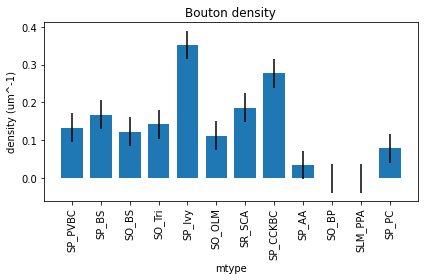

In [6]:
fig, ax = plt.subplots()

labels = mtypes
ind = np.arange(len(labels))
width = 0.75

s = ax.bar(ind, df['mean'], width, yerr=df.loc[mtype]['std'])

ax.set_xlabel('mtype')
ax.set_ylabel('density (um^-1)')
ax.set_title('Bouton density')
ax.set_xticks(ind)
ax.set_xticklabels(labels, rotation='vertical')

fig.tight_layout()

fig.show()

In [ ]:
# reference biological dataset
bio_path = '/home/data-bbp/20191017/bioname/bouton_density_20190131.tsv'

In [ ]:
data = pd.read_csv(bio_path, names=['mtype', 'bio_mean', 'bio_std'], skiprows=2, usecols=[0,1,2], delim_whitespace=True)
data.head()

In [ ]:
selected = data['mtype'].values
data['mod_mean'] = df.loc[selected]['mean'].values
data['mod_std'] = df.loc[selected]['std'].values
data.head()

In [ ]:
plt.close('all')

x = data['mod_mean'].values
y = data['bio_mean'].values
# remove nan value from the array
# l = np.linspace(0, max(x[~np.isnan(x)].max(), y.max()), 50)
l = np.linspace(0, max(x.max(), y.max()), 50)
fig, ax = plt.subplots()
fig.suptitle('Bouton density')
ax.plot(x, y, 'o')
ax.errorbar(x, y, xerr=data['mod_std'].values, yerr=data['bio_std'].values, fmt='o', ecolor='g', capthick=2)
ax.plot(l, l, 'k--')
ax.set_xlabel('Model (um^-1)')
ax.set_ylabel('Experiment (um^-1)')

fig.show()

In [ ]:
# Work here

### Exercise #1
Calculate the average bouton density in an interneuron and a neuron in general. Store the answer in ans_1a and ans_1b.

__Hint__: to query gids of interneurons use Cell.SYNAPSE_CLASS. When you query all the interneurons, you do not need any filters.

### Exercise #2
Calculate bouton density not in the central column. Is it lower, bigger or the same of the bouton density calculated in the central column? Why?

In [ ]:
# This is to generate the answers to paste in the submission box below.
# Run this and copy-paste the output into the box below
print(json.dumps(dict([("ans_1a", ans_1a),
                       ("ans_1b", ans_1b),
                       ("ans_2a", ans_2a),
                       ("ans_2b", ans_2b)])))

In [ ]:
!pip -q install -i https://bbpteam.epfl.ch/repository/devpi/simple/ single-cell-mooc-client==0.0.5 
import single_cell_mooc_client as sc_mc
s = sc_mc.Submission(hideToken=True)

In [ ]:
s.show_submission(ROLLBACK, TOKEN)